In [1]:
from __future__ import division, print_function
import joblib
import numpy as np
from IPython.display import SVG

In [2]:
from qbs import jnk, utils
from glob import glob
targets = [s.replace('datasets/', '') for s in glob('datasets/*')]

import matplotlib.pyplot as plt
%pylab inline
figsize(20, 10)
import seaborn as sns

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Following setup needs to be run by the user, since the relevant files are too large to be committed into git.

In [4]:
sorted_targets = sorted(targets, key=lambda x: len(utils.get_data(x)[0]))

In [5]:
fps = joblib.load('all_fps.npy')
all_smiles = np.asarray(joblib.load('all_mols'))

In [6]:
# unit test - check that nbs_run() from old library gives the same value
# as the good_good value from the jnk library

In [7]:
model_dict = utils.get_model_dict()

In [8]:
good_keys = ['rdgcv', 'rf']

In [9]:
for k in model_dict.keys():
    if not k in good_keys: del model_dict[k] 

In [10]:
reload(jnk)
reload(utils)

<module 'qbs.utils' from 'qbs/utils.pyc'>

In [10]:
jnk.runner('junk_models/', sorted_targets, model_dict, all_smiles, fps, use_pool=False)

Doing A2a
Doing Dopamine
Doing Dihydrofolate
Doing Carbonic
Doing ABL1
Doing opioid
Doing Cannabinoid
Doing Androgen
Doing COX-1
Doing Monoamine
Doing LCK
Doing Glucocortic
Doing Ephrin
Doing Caspase
Doing Coagulation
Doing Estrogen
Doing B-raf
Doing Glycogen
Doing Vanilloid
Doing Aurora-A
Doing JAK2
Doing COX-2
Doing Acetylcholin
Doing erbB1
Doing HERG
Completed


In [26]:
reload(jnk)

<module 'qbs.jnk' from 'qbs/jnk.py'>

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
figsize(20, 10)

In [24]:
sorted(model_dict.keys())

['rdgcv', 'rf']

junk_models/loss_10_mse.pdf


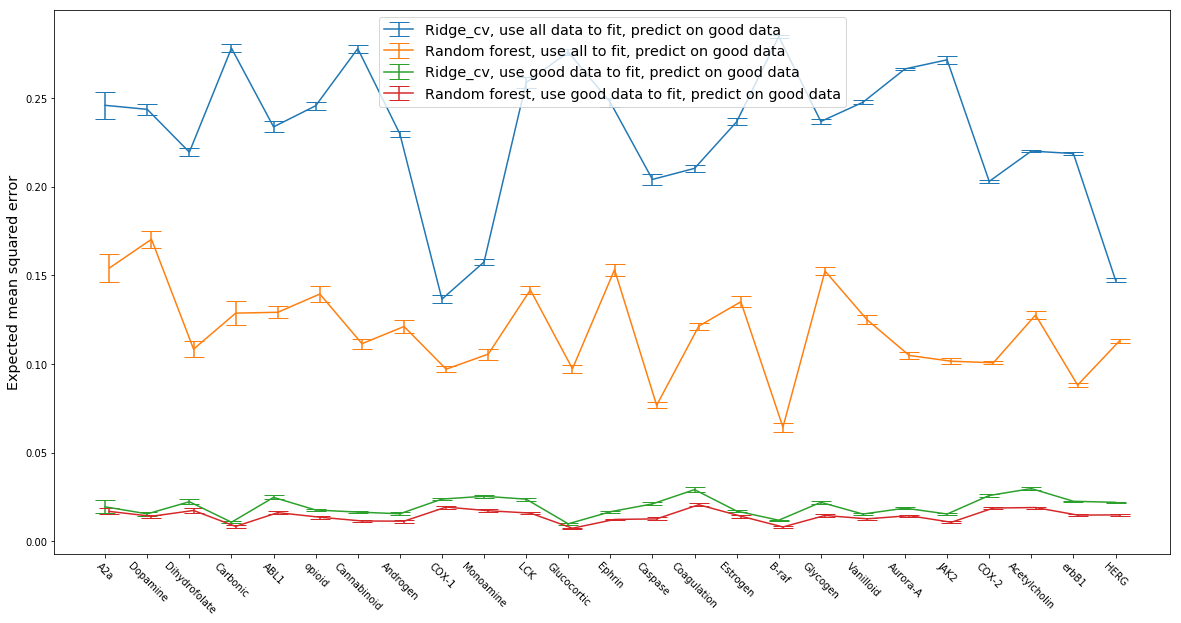

In [27]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgarb_pgood', 'mgood_pgood'], 
            ['Ridge_cv, use all data to fit, predict on good data',  
             'Random forest, use all to fit, predict on good data',
             'Ridge_cv, use good data to fit, predict on good data',  
             'Random forest, use good data to fit, predict on good data',
            ])

First - some comments about how to understand this plot.  The MSE is massively biased when we fit on all the data, since we fit on a vast population of inactives, our mean prediction (bias) is going to be massively off. This hugely affects the MSE.  The bottom two lines (fit on good, predict on good) correspond to our earlier work in the QuantileBootstrap notebook (see below to reproduce)

In [28]:
labels = ['Deep Learning','Random Forests','Ridge Regression','Support Vector Regression']

In [32]:
full_md = utils.get_model_dict()
for k in ['svrl', 'mars', 'rdgcv']:
    del full_md[k]

In [34]:
sorted(full_md.keys())

['dl_l', 'rf', 'ridge', 'svr']

models_final_dl/loss_10_mse.pdf


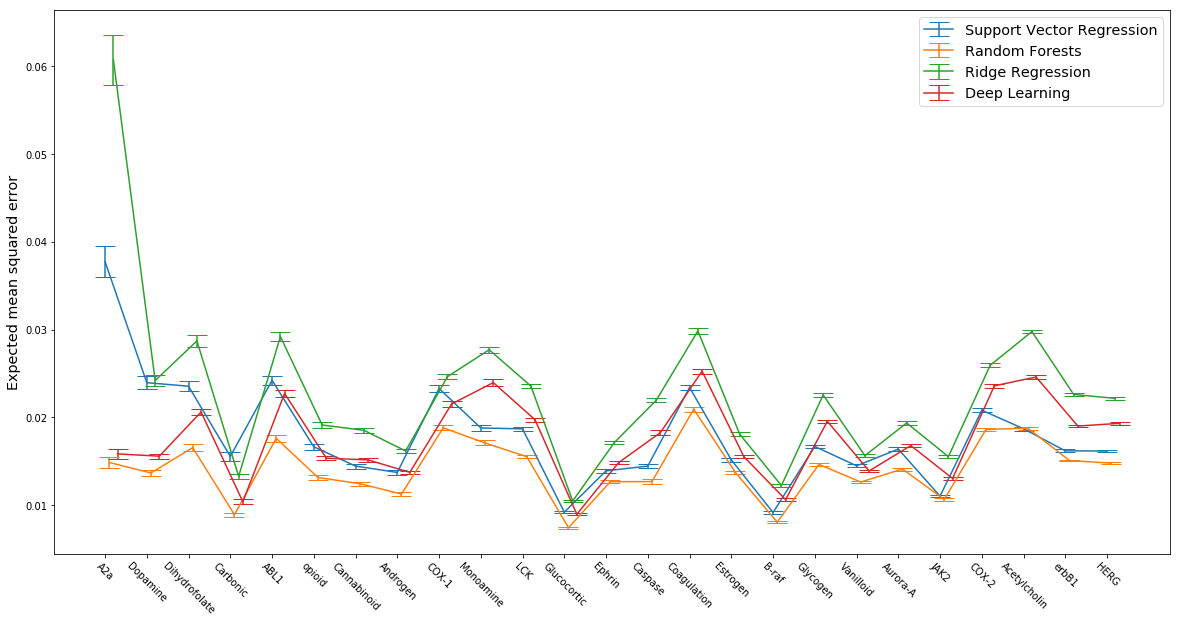

In [35]:
utils.plotter('models_final_dl/', full_md, sorted_targets, labels)

Now lets see how we do on 'predicting on all molecules'.

junk_models/loss_10_mse.pdf


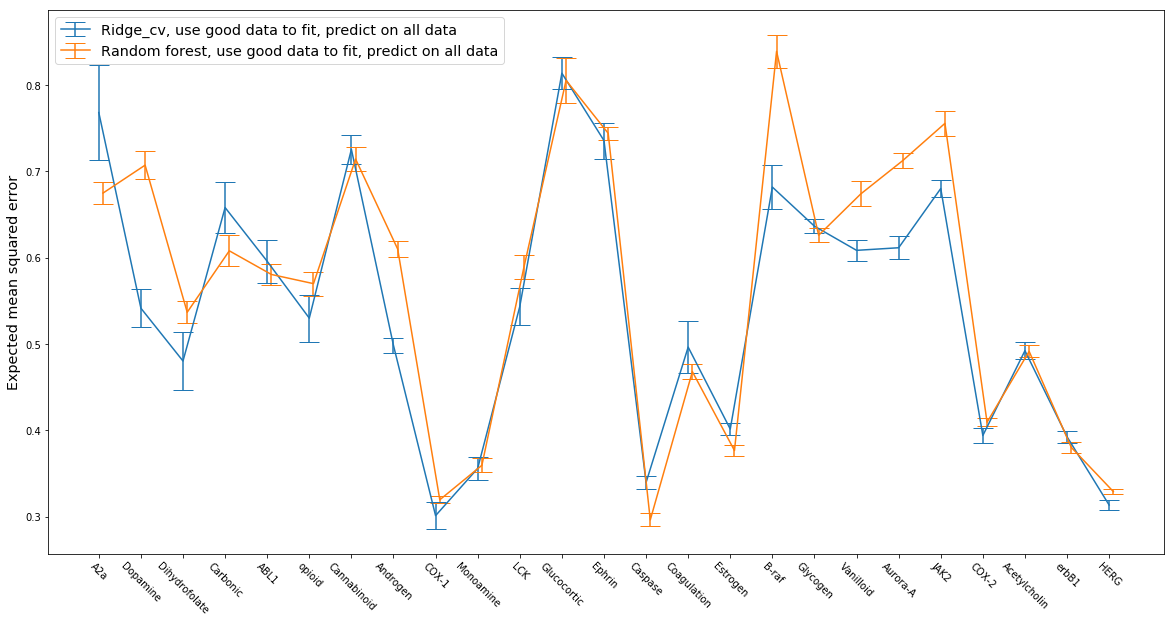

In [38]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgood_pgarb',], 
             ['Ridge_cv, use good data to fit, predict on all data',  
             'Random forest, use good data to fit, predict on all data',
            ])

Obviously the MSE is massive (this is one problem with MSE) - but interestingly, we now no longer see much of an advantage of random forest over ridge.  The two models perform about equally (badly).


So let's move on to the last model, where we fit and predict on all data.  

junk_models/loss_10_mse.pdf


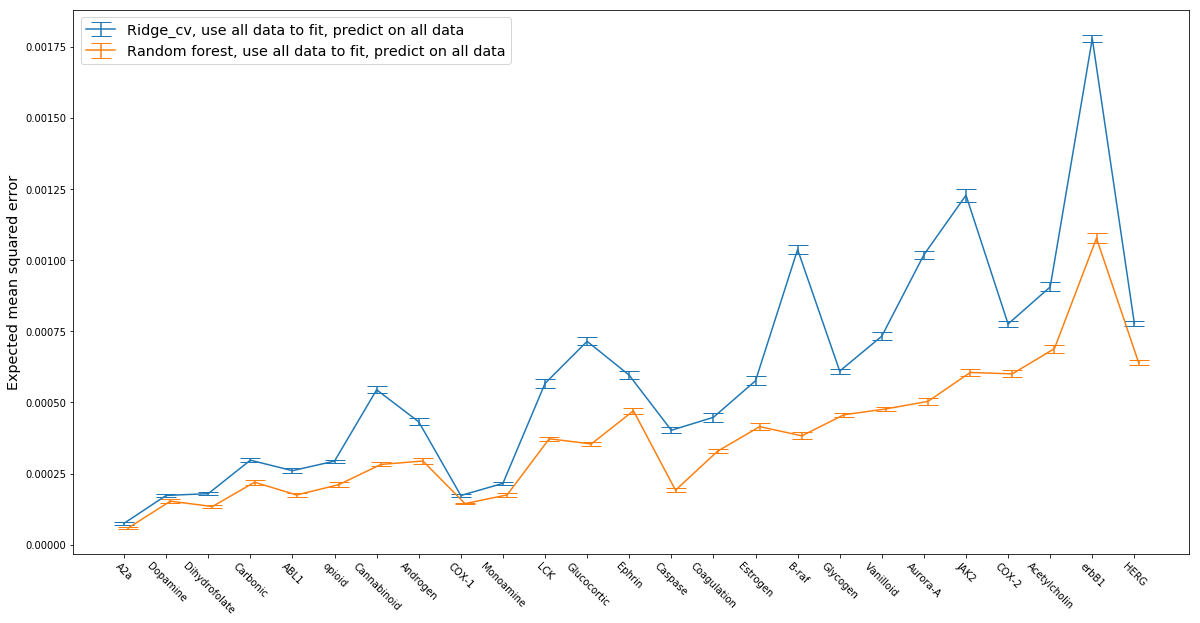

In [39]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgarb_pgarb',], 
             ['Ridge_cv, use all data to fit, predict on all data',  
             'Random forest, use all data to fit, predict on all data',
            ])

This is interesting.  First of all, we see RF does substantially better (on every single target).  The MSE is of course very small, since there isn't that much variation in our dataset (1.8M molecules - small number that we have data for are all set to IP50 = 3.5).  Again - this is a problem with MSE - it doesn't tell us whether it's _better_ in some real sense to fit on all data or just the good data...

So now let's turn to our other measures...  These have the nice feature that we can look at them all on one plot!

junk_models/loss_10_loss_avg_90.pdf


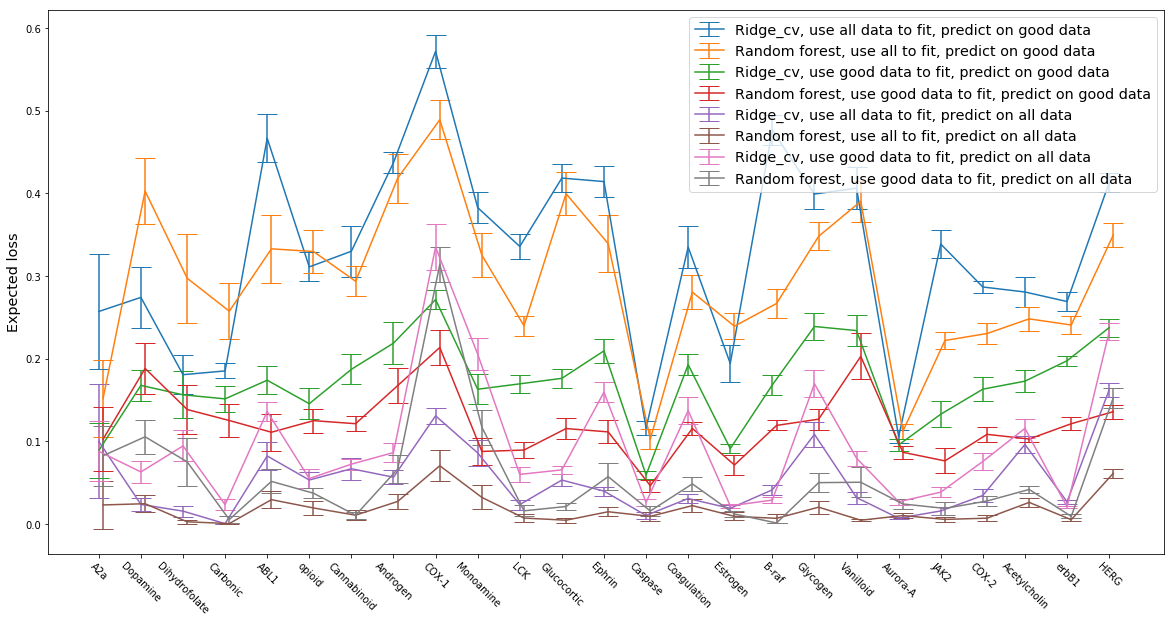

In [41]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgarb_pgood', 'mgood_pgood', 'mgarb_pgarb', 'mgood_pgarb'], 
            ['Ridge_cv, use all data to fit, predict on good data',  
             'Random forest, use all to fit, predict on good data',
             'Ridge_cv, use good data to fit, predict on good data',  
             'Random forest, use good data to fit, predict on good data',
             'Ridge_cv, use all data to fit, predict on all data',  
             'Random forest, use all to fit, predict on all data',
             'Ridge_cv, use good data to fit, predict on all data',  
             'Random forest, use good data to fit, predict on all data', 
            ], loss='loss_avg_90')

But let's actually break this up a bit.  Suppose you're trying to pick molecules from a sample you think is like 'random molecules' (all data)...

junk_models/loss_10_loss_avg_90.pdf


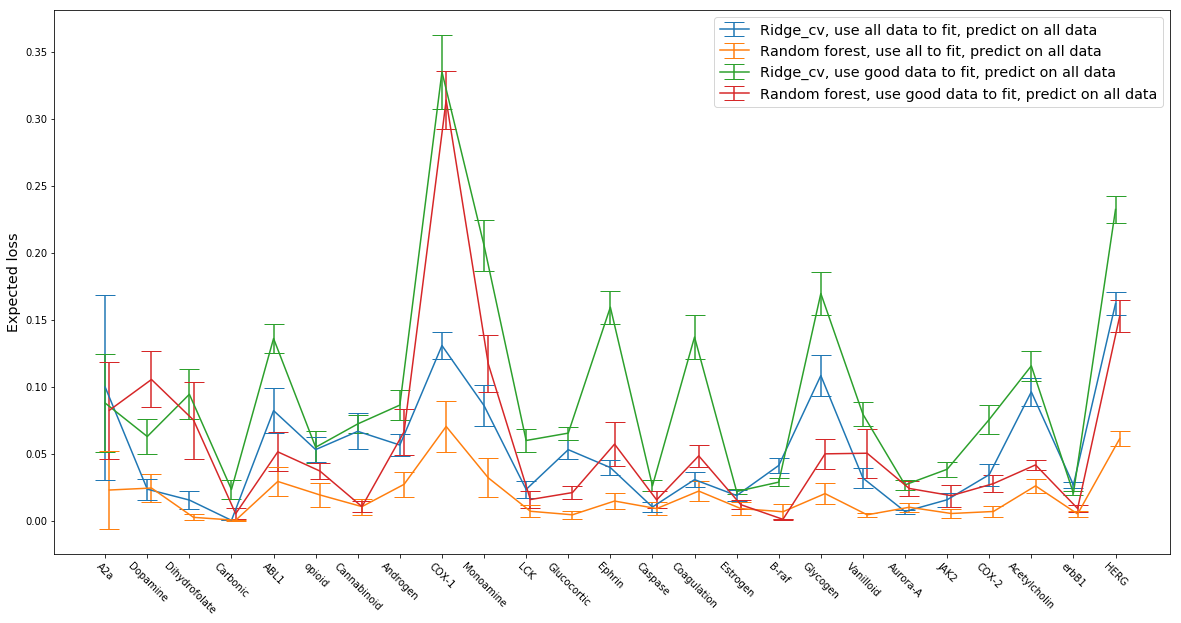

In [42]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgarb_pgarb', 'mgood_pgarb'], 
            ['Ridge_cv, use all data to fit, predict on all data',  
             'Random forest, use all to fit, predict on all data',
             'Ridge_cv, use good data to fit, predict on all data',  
             'Random forest, use good data to fit, predict on all data', 
            ], loss='loss_avg_90')

It seems like you definitely want to use random forest - and you want to fit on all the data - orange beats red pretty much throughout, sometimes by a lot (but the main thing is you want to use RF!)

Suppose you want to pick from 'very similar' molecules (whatever that means!)

junk_models/loss_10_loss_avg_90.pdf


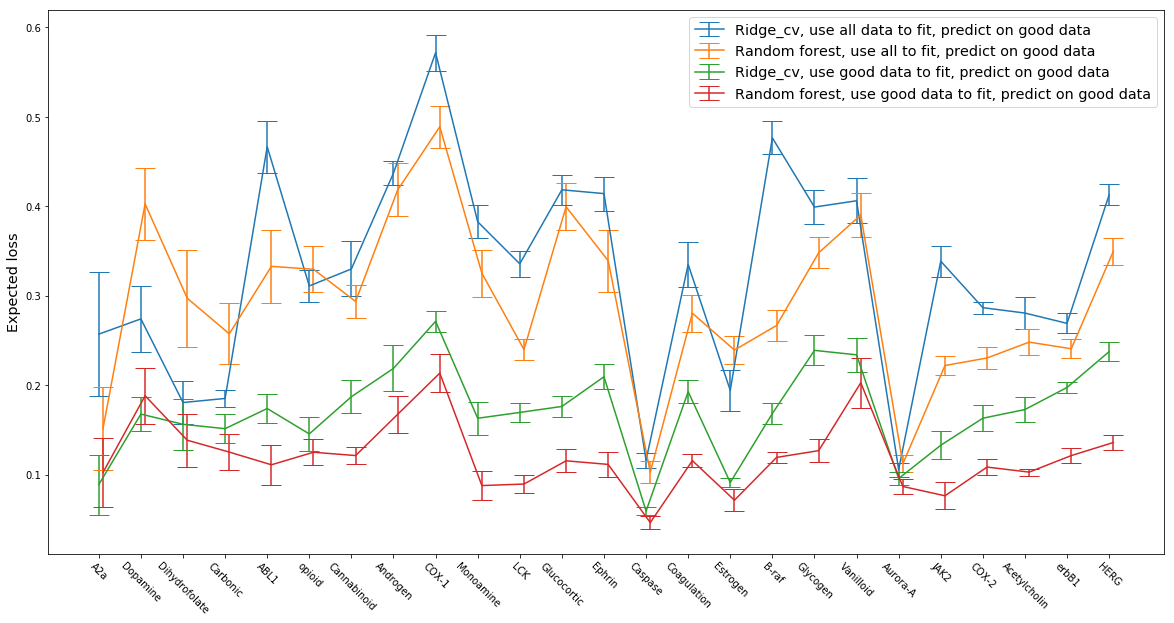

In [43]:
jnk.plotter('junk_models/', model_dict, sorted_targets, ['mgarb_pgood', 'mgood_pgood'], 
            ['Ridge_cv, use all data to fit, predict on good data',  
             'Random forest, use all to fit, predict on good data',
             'Ridge_cv, use good data to fit, predict on good data',  
             'Random forest, use good data to fit, predict on good data', 
            ], loss='loss_avg_90')

Then it seems clear that you want to fit only on the good data! And that choice of data is more important than the choice of algorithm...

In [44]:
print('hello')

hello
